<a href="https://colab.research.google.com/github/vansh-mandekar/Automated-Essay-Scoring/blob/main/AES_usingBART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from torch import tensor

In [2]:
pip install transformers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
file_path1 = '/content/drive/MyDrive/aes_094/training_set_rel3.xls'
df = pd.read_excel(file_path1)
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.domain1_score.value_counts()

3.0     2830
2.0     2445
1.0     1736
4.0     1424
8.0      737
0.0      419
9.0      383
10.0     372
16.0     199
11.0     165
7.0      163
40.0     161
17.0     160
6.0      137
12.0     133
18.0     118
14.0     105
20.0     103
24.0      99
5.0       96
19.0      88
15.0      86
13.0      82
21.0      70
36.0      65
22.0      63
23.0      53
30.0      49
35.0      47
37.0      39
34.0      39
32.0      37
31.0      34
33.0      32
45.0      31
42.0      23
41.0      22
38.0      20
43.0      15
44.0      14
50.0      13
46.0      13
28.0      11
39.0       8
29.0       8
47.0       7
27.0       6
25.0       5
26.0       4
48.0       3
55.0       2
49.0       2
60.0       1
Name: domain1_score, dtype: int64

In [6]:
df.essay_id.value_counts()

1        1
13401    1
13391    1
13392    1
13393    1
        ..
6726     1
6727     1
6728     1
6729     1
21633    1
Name: essay_id, Length: 12978, dtype: int64

<Axes: xlabel='domain1_score'>

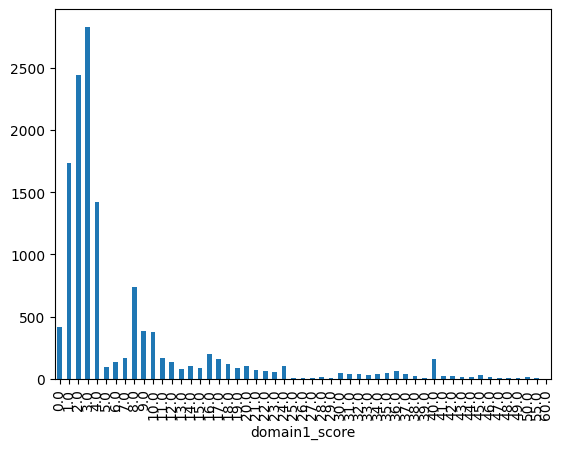

In [7]:
df.groupby(['domain1_score']).size().plot.bar()

In [8]:
df = df[df['domain1_score'] <= 18]

<Axes: xlabel='domain1_score'>

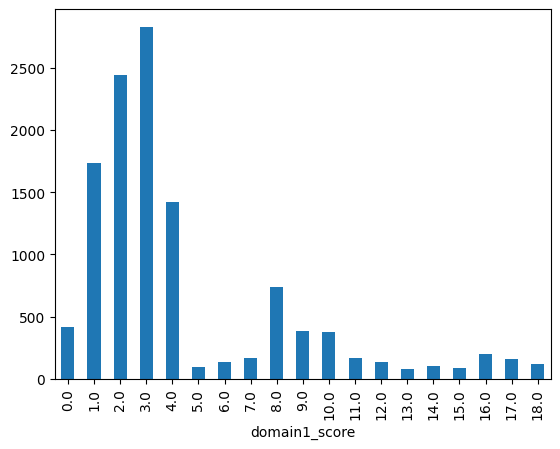

In [9]:
df.groupby(['domain1_score']).size().plot.bar()

In [10]:
df.domain1_score.value_counts()

3.0     2830
2.0     2445
1.0     1736
4.0     1424
8.0      737
0.0      419
9.0      383
10.0     372
16.0     199
11.0     165
7.0      163
17.0     160
6.0      137
12.0     133
18.0     118
14.0     105
5.0       96
15.0      86
13.0      82
Name: domain1_score, dtype: int64

In [11]:
print(df.columns)

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')


In [12]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10,
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])
tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tensor([[  101,   146,  1209,  2824,  2508, 26173,  3568,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11790 entries, 0 to 12968
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        11790 non-null  int64  
 1   essay_set       11790 non-null  int64  
 2   essay           11790 non-null  object 
 3   rater1_domain1  11790 non-null  float64
 4   rater2_domain1  11790 non-null  float64
 5   rater3_domain1  0 non-null      float64
 6   domain1_score   11790 non-null  float64
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   1105 non-null   float64
 11  rater1_trait2   1105 non-null   float64
 12  rater1_trait3   1105 non-null   float64
 13  rater1_trait4   1105 non-null   float64
 14  rater1_trait5   2 non-null      float64
 15  rater1_trait6   2 non-null      float64
 16  rater2_trait1   1105 non-null   float64
 17  rater2_trait2   1105 non-null  

In [14]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = { 0.0:0,
           1.0:1,
           2.0:2,
           3.0:3,
           4.0:4,
           5.0:5,
           6.0:6,
           7.0:7,
           8.0:8,
           9.0:9,
          10.0:10,
          11.0:11,
          12.0:12,
          13.0:13,
          14.0:14,
          15.0:15,
          16.0:16,
          17.0:17,
          18.0:18,
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['domain1_score']]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['essay']]


    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [15]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

9432 1179 1179


In [16]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.6):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 19)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [17]:
from torch.optim import Adam
from tqdm import tqdm
import os

def train(model, train_data, val_data, learning_rate, epochs, checkpoint_interval=1):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    # Load the model checkpoint if it exists
    checkpoint_path = 'model_checkpoint.pth'
    if os.path.exists(checkpoint_path):
        model.load_state_dict(torch.load(checkpoint_path))

    for epoch_num in range(epochs):

        total_acc_train = 0
        total_loss_train = 0

        for train_input, train_label in tqdm(train_dataloader):

            train_label = train_label.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)

            batch_loss = criterion(output, train_label.long())
            total_loss_train += batch_loss.item()

            acc = (output.argmax(dim=1) == train_label).sum().item()
            total_acc_train += acc

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        total_acc_val = 0
        total_loss_val = 0

        with torch.no_grad():

            for val_input, val_label in val_dataloader:

                val_label = val_label.to(device)
                mask = val_input['attention_mask'].to(device)
                input_id = val_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, val_label.long())
                total_loss_val += batch_loss.item()

                acc = (output.argmax(dim=1) == val_label).sum().item()
                total_acc_val += acc

        print(
            f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
            | Train Accuracy: {total_acc_train / len(train_data): .3f} \
            | Val Loss: {total_loss_val / len(val_data): .3f} \
            | Val Accuracy: {total_acc_val / len(val_data): .3f}')

        # Save the model checkpoint at specified intervals
        if (epoch_num + 1) % checkpoint_interval == 0:
            torch.save(model.state_dict(), checkpoint_path)

EPOCHS = 5  # Train for 1 epoch initially
model = BertClassifier()
LR = 2e-6
checkpoint_interval = 1  # Save the model checkpoint every epoch

train(model, df_train, df_val, LR, EPOCHS, checkpoint_interval)


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

100%|██████████| 4716/4716 [17:14<00:00,  4.56it/s]


Epochs: 1 | Train Loss:  0.905             | Train Accuracy:  0.437             | Val Loss:  0.699             | Val Accuracy:  0.550


100%|██████████| 4716/4716 [17:21<00:00,  4.53it/s]


Epochs: 2 | Train Loss:  0.622             | Train Accuracy:  0.574             | Val Loss:  0.611             | Val Accuracy:  0.562


100%|██████████| 4716/4716 [17:22<00:00,  4.53it/s]


Epochs: 3 | Train Loss:  0.539             | Train Accuracy:  0.628             | Val Loss:  0.583             | Val Accuracy:  0.587


100%|██████████| 4716/4716 [17:21<00:00,  4.53it/s]


Epochs: 4 | Train Loss:  0.455             | Train Accuracy:  0.695             | Val Loss:  0.565             | Val Accuracy:  0.584


100%|██████████| 4716/4716 [17:21<00:00,  4.53it/s]


Epochs: 5 | Train Loss:  0.374             | Train Accuracy:  0.764             | Val Loss:  0.574             | Val Accuracy:  0.588


In [18]:
from google.colab import files

files.download('model_checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>